In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import csv
import datetime
from geopy import distance
import numpy as np
import time
import gmaps
import gmaps.datasets
from googlemaps import Client as GoogleMaps
import requests
import calendar
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import scipy.stats as st
from scipy.stats import linregress

In [2]:
Bike_2019_clean = pd.read_csv("../Group-Project_team3/Resources/Bike_2019_clean.csv", index_col=[0])
Bike_2020_clean = pd.read_csv("../Group-Project_team3/Resources/Bike_2020_clean.csv", index_col=[0])


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Bike_2019_clean.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled,year,Month,Hour,Id
445385,1105,2019-04-11 18:45:00,2019-04-11 19:04:00,31200,Massachusetts Ave & Dupont Circle NW,31509,New Jersey Ave & R St NW,W00520,Member,38.918751,-77.059675,38.903223,-77.013992,Thursday,4.31,2019,Apr,18,31200-31509
717082,1464,2019-04-30 14:27:00,2019-04-30 14:52:00,31287,10th St & L'Enfant Plaza SW,31006,Army Navy Dr & S Joyce St,W21284,Member,38.902864,-77.025590,38.858907,-77.069584,Tuesday,6.20,2019,Apr,14,31287-31006
124776,1610,2019-06-03 15:21:00,2019-06-03 15:48:00,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31633,Independence Ave & L'Enfant Plaza SW/DOE,W00960,Casual,38.890984,-77.048817,38.887568,-77.029503,Monday,1.71,2019,Jun,15,31289-31633
685803,834,2019-05-23 07:40:00,2019-05-23 07:54:00,31107,Lamont & Mt Pleasant NW,31417,Kansas Ave & Sherman Cr NW,W23016,Member,38.931279,-77.044576,39.002271,-77.049680,Thursday,7.91,2019,May,7,31107-31417
555061,482,2019-06-09 23:03:00,2019-06-09 23:11:00,31419,Georgia Ave & Morton St NW,31107,Lamont & Mt Pleasant NW,W21877,Member,39.106596,-77.076195,38.931279,-77.044576,Sunday,19.68,2019,Jun,23,31419-31107


In [4]:
Bike_2020_clean.sample(5)

,Id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Distance Traveled,Member type,is_equity,day_of_week,year,Duration,Month,Hour
60107,8D8A85BA099EC86A,docked_bike,2020-04-21 17:10:00,2020-04-21 17:35:00,15th St & Pennsylvania Ave NW,544.0,15th St & Constitution Ave NW,531.0,38.896500,-77.033400,38.892200,-77.03320,0.478451,casual,NaN,Tuesday,2020,1500,Apr,18
213671,3BACE3867B45DE77,docked_bike,2020-05-21 17:57:00,2020-05-21 18:25:00,20th & L St NW,266.0,3rd & D St SE,67.0,38.903600,-77.044800,38.885100,-77.00230,4.214276,casual,False,Thursday,2020,1680,May,20
397153,BEA6857212F45A70,docked_bike,2020-06-03 10:27:00,2020-06-03 10:48:00,16th & Harvard St NW,16.0,6th St & Indiana Ave NW,248.0,38.926088,-77.036536,38.894573,-77.01994,3.787102,member,NaN,Wednesday,2020,1260,Jun,17
146592,17969A97B2AE39EE,docked_bike,2020-05-31 00:15:00,2020-05-31 00:36:00,Massachusetts Ave & Dupont Circle NW,24.0,20th St & Florida Ave NW,23.0,38.910100,-77.044400,38.915400,-77.04460,0.589587,member,False,Sunday,2020,1260,May,9
56990,94919F6B6153B214,docked_bike,2020-04-07 12:28:00,2020-04-07 12:46:00,16th & R St NW,430.0,1st & M St NE,65.0,38.912700,-77.036300,38.905700,-77.00560,2.768023,member,NaN,Tuesday,2020,1080,Apr,13


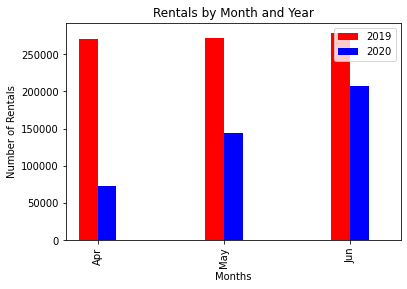

Comparison of bike rentals during peak Covid-19, 2nd Quarter of 2020 compared to same period in 2019


In [5]:
colors = ['#034694','#001C58','#5CBFEB']
bar_width = .15
b_2019 = Bike_2019_clean["Month"].value_counts().sort_values(ascending= True)
b_2020 =Bike_2020_clean['Month'].value_counts().sort_values(ascending=True)
#b_2019.plot(kind = 'bar', title ="Rentals by Month",fontsize=12, color = colors, position=1)
b_2019.plot(kind='bar', color='red', width=bar_width, position =1)
b_2020.plot(kind='bar', color='blue', width=bar_width, position=0)

plt.xlabel("Months")
plt.ylabel("Number of Rentals")
plt.title("Rentals by Month and Year")
plt.legend(["2019", "2020"])
plt.savefig('images/ridesPer_month.png', dpi=300, bbox_inches='tight')
plt.show()
print ("Comparison of bike rentals during peak Covid-19, 2nd Quarter of 2020 compared to same period in 2019")

In [6]:
member = Bike_2020_clean.groupby('Member type').agg('count')
member_2019 = Bike_2019_clean.groupby("Member type").agg("count")


During the second quarter of 2020 (Covid-19) bike rentals were evenly split between casual renters (210902) and members(213794)
During the second quarter of 2019 (pre-Covid-19) bikes were primarily rented(85%) by members (106312) and casual renters(714524)


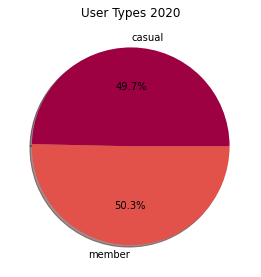

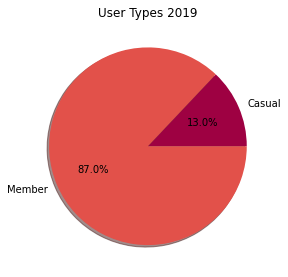

In [7]:
type_labels = member.Duration.sort_values().index 
type_counts = member.Duration.sort_values()
type_counts2 = member_2019.Duration.sort_values()
type_labels2 = member_2019.Duration.sort_values().index
print(f'During the second quarter of 2020 (Covid-19) bike rentals were evenly split between casual renters\
 ({[type_counts][0][0]}) and\
 members({[type_counts][0][1]})')
print(f'During the second quarter of 2019 (pre-Covid-19) bikes were primarily rented(85%) by members\
 ({[type_counts2][0][0]}) and\
 casual renters({[type_counts2][0][1]})')
#print(f'({type_counts}')
plt.figure(0, figsize=(20,10)) 
the_grid = GridSpec(2,2,)
cmap = plt.get_cmap('Spectral')
color1=['#034694','#001C58']
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2020')
type_members = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2019')
type_members2 = plt.pie(type_counts2, labels = type_labels2,autopct='%1.1f%%', shadow=True, colors=colors)
plt.savefig('images/User_types19_20.png', dpi=300, bbox_inches='tight')
plt.show()

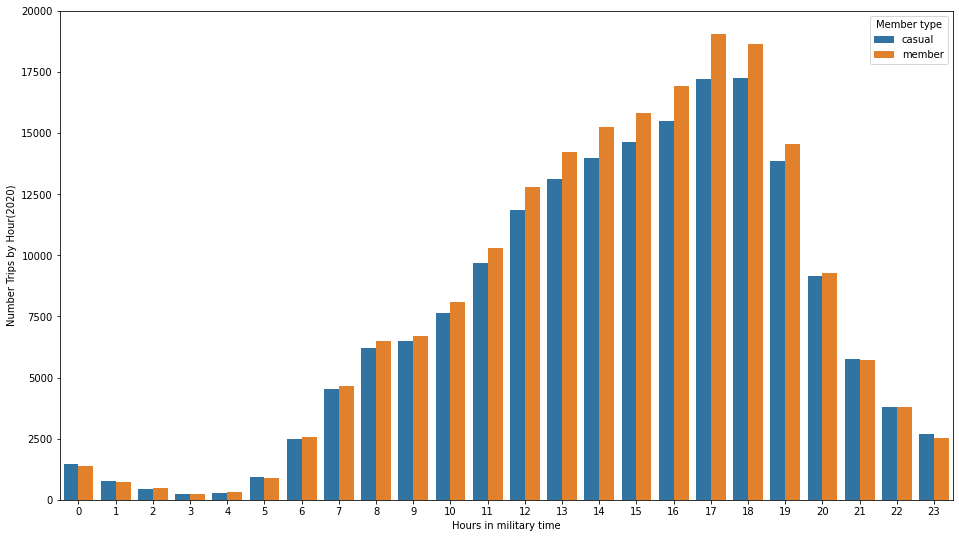

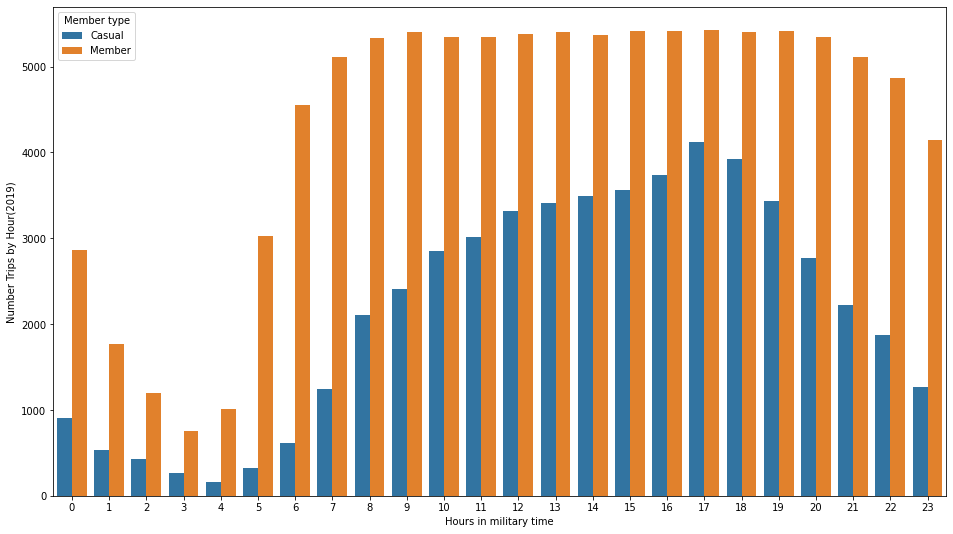

In [8]:
hour_use =Bike_2020_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use, ax=ax)
ax.set_ylabel("Number Trips by Hour(2020)")
ax.set_xlabel("Hours in military time")
plt.savefig('images/tripsByHour2020.png', dpi=300, bbox_inches='tight')
hour_use19 =Bike_2019_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use19, ax=ax)
ax.set_ylabel("Number Trips by Hour(2019)")
ax.set_xlabel("Hours in military time")
plt.savefig('images/tripsByHour2019.png', dpi=300, bbox_inches='tight')

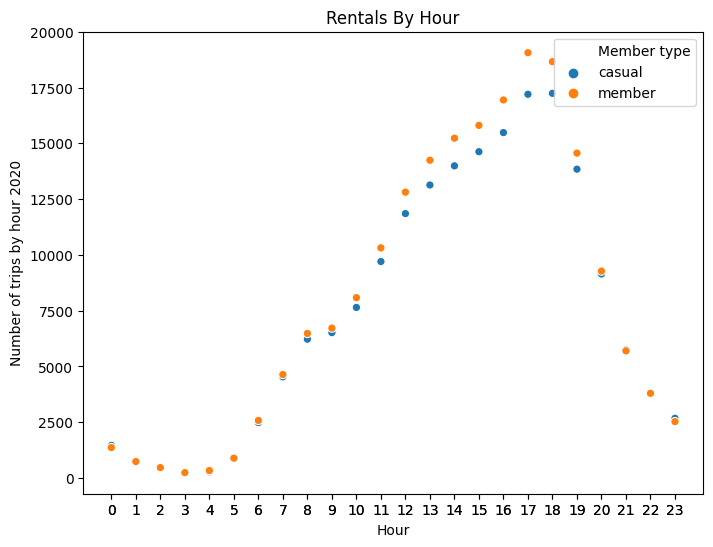

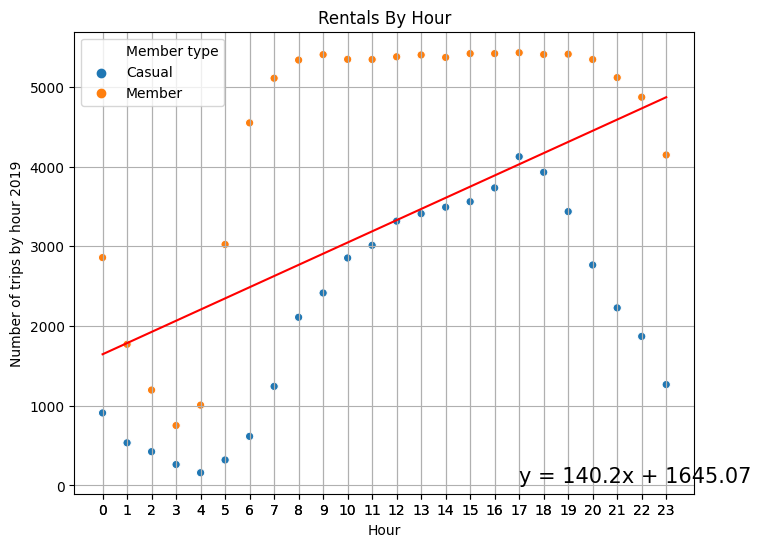

In [17]:
hour_use =Bike_2020_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
hour_use19 =Bike_2019_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Hour', y='Id', hue='Member type', data=hour_use)
plt.title("Rentals By Hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips by hour 2020")
plt.xticks(hour_use.Hour.values)
plt.show()
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Hour', y='Id', hue='Member type', data=hour_use19)
plt.title("Rentals By Hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips by hour 2019")
plt.xticks(hour_use19.Hour.values)
x_values = hour_use19['Hour']
y_values =hour_use19['Id']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,35),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)
plt.grid(True)
plt.show()

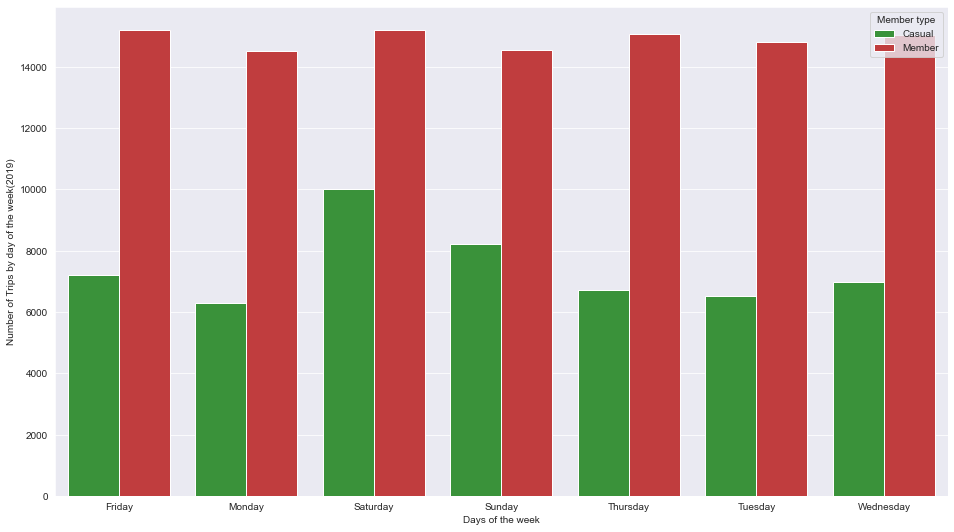

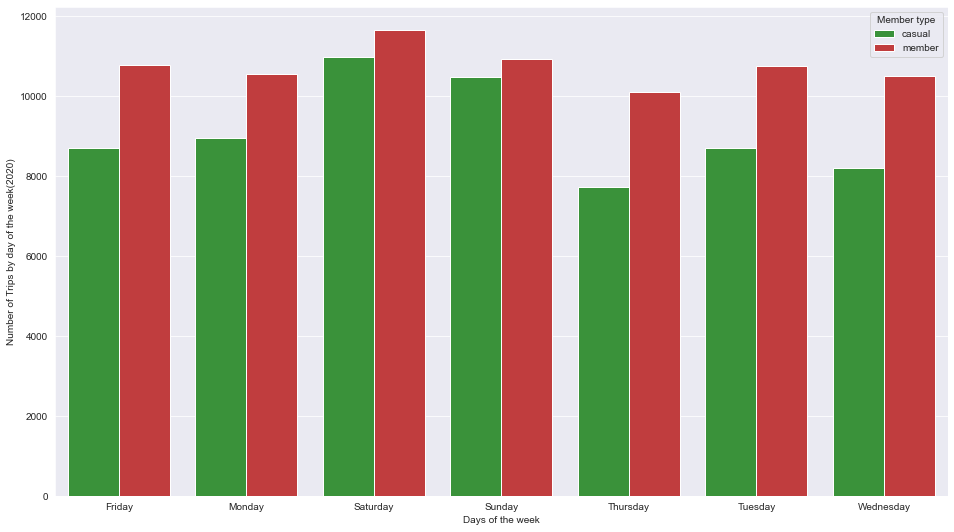

In [10]:
sns.set_style('darkgrid')
unique = hour_use19["Member type"].append(hour_use["Member type"]).unique()
unique1 = hour_use["Member type"].append(hour_use19["Member type"]).unique()
palette = dict(zip(unique, sns.color_palette()))
palette1 = dict(zip(unique1, sns.color_palette()))
palette.update({"Total":"k"})
hour_use19 =Bike_2019_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use19, ax=ax,ci=None, palette=palette1)
ax.set_ylabel("Number of Trips by day of the week(2019)")
ax.set_xlabel("Days of the week")
plt.savefig('images/tripsByDay2019.png', dpi=300, bbox_inches='tight')
hour_use =Bike_2020_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use, ax=ax, ci=None, palette=palette)
ax.set_ylabel("Number of Trips by day of the week(2020)")
ax.set_xlabel("Days of the week")
plt.savefig('images/tripsByDay2020.png', dpi=300, bbox_inches='tight')

In [11]:
temp_df = Bike_2019_clean[["day_of_week", "Hour"]]
Sunday = temp_df[temp_df.day_of_week == "Sunday"]
Monday = temp_df[temp_df.day_of_week == "Monday"]
Tuesday = temp_df[temp_df.day_of_week == "Tuesday"]
Wednesday = temp_df[temp_df.day_of_week == "Wednesday"]
Thursday = temp_df[temp_df.day_of_week == "Thursday"]
Friday = temp_df[temp_df.day_of_week == "Friday"]
Saturday = temp_df[temp_df.day_of_week == "Saturday"]

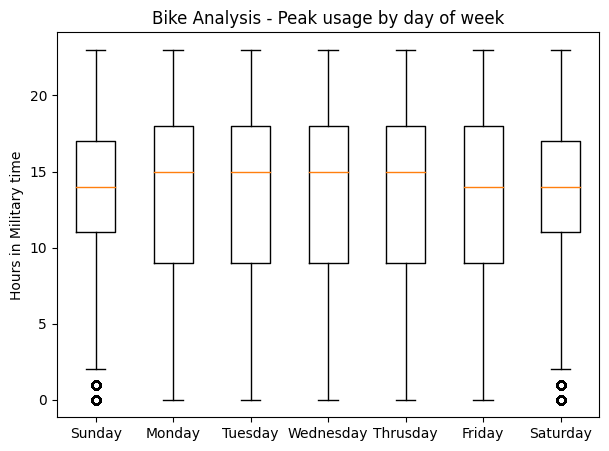

In [12]:
# Hina Graph Box Plot 


# Create and format Box Plot 

plt.style.use('default')

plt.figure(figsize=(7,5))

labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thrusday", "Friday", "Saturday"]
          

plt.boxplot([Sunday.Hour, Monday.Hour, Tuesday.Hour, Wednesday.Hour, Thursday.Hour, Friday.Hour, Saturday.Hour], labels=labels)

plt.title ("Bike Analysis - Peak usage by day of week")
plt.ylabel ("Hours in Military time")
plt.savefig('images/peak_Usage_dayofweek.png', dpi=300, bbox_inches='tight')
plt.show()